# Traffic Signs Recognition using CNN & Keras
## What is Traffic Signs Recognition?
- There are several different types of traffic signs like speed limits, no entry, traffic signals, turn left or right, children crossing, no passing of heavy vehicles, etc. Traffic signs classification is the process of identifying which class a traffic sign belongs to.

- In this project, we will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

## Dataset Information:
- The dataset contains more than 50,000 images of different traffic signs. It is further classified into 43 different classes. The dataset is quite varying, some of the classes have many images while some classes have few images. The size of the dataset is around 300 MB. The dataset has a train folder which contains images inside each class and a test folder which we will use for testing our model.
- 43 Classes are as follows:
    -       1: Speed limit (20km/h),
    -       2: Speed limit (30km/h), 
    -       3: Speed limit (50km/h), 
    -       4: Speed limit (60km/h), 
    -       5: Speed limit (70km/h), 
    -       6: Speed limit (80km/h), 
    -       7: End of speed limit (80km/h), 
    -       8: Speed limit (100km/h), 
    -       9: Speed limit (120km/h), 
    -       10: No passing, 
    -       11: No passing veh over 3.5 tons, 
    -       12: Right-of-way at intersection, 
    -       13: Priority road, 
    -       14: Yield, 
    -       15: Stop, 
    -       16: No vehicles, 
    -       17: Veh > 3.5 tons prohibited, 
    -       18: No entry, 
    -       19: General caution, 
    -       20: Dangerous curve left, 
    -       21: Dangerous curve right, 
    -       22: Double curve, 
    -       23: Bumpy road, 
    -       24: Slippery road, 
    -       25: Road narrows on the right, 
    -       26: Road work, 
    -       27: Traffic signals, 
    -       28: Pedestrians, 
    -       29: Children crossing, 
    -       30: Bicycles crossing, 
    -       31: Beware of ice/snow,
    -       32: Wild animals crossing, 
    -       33: End speed + passing limits, 
    -       34: Turn right ahead, 
    -       35: Turn left ahead, 
    -       36: Ahead only, 
    -       37: Go straight or right, 
    -       38: Go straight or left, 
    -       39: Keep right, 
    -       40: Keep left, 
    -       41: Roundabout mandatory, 
    -       42: End of no passing, 
    -       43: End no passing veh > 3.5 tons

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Exploring the data

In [5]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

- Our ‘train’ folder contains 43 folders each representing a different class. The range of the folder is from 0 to 42. With the help of the OS module, we iterate over all the classes and append images and their respective labels in the data and labels list.
- The PIL library is used to open image content into an array.
- Then we have finally stored all the images and their labels into lists (data and labels). We need to convert the list into numpy arrays for feeding to the model.

In [6]:
print("Shape of the data: ", data.shape, "Shape of the Labels: ", labels.shape)

Shape of the data:  (39209, 30, 30, 3) Shape of the Labels:  (39209,)


# Splitting of the data

In [16]:
# Splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=27)
print(" X_train shape: ", X_train.shape, "\n", "X_test shape: ", X_test.shape,"\n", "y_train shape: ", y_train.shape, "\n", "y_test shape: ", y_test.shape)

 X_train shape:  (31367, 30, 30, 3) 
 X_test shape:  (7842, 30, 30, 3) 
 y_train shape:  (31367,) 
 y_test shape:  (7842,)


In [18]:
y_train[0]

36

In [19]:
y_test[0]

27

# One Hot Encoding
- After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0
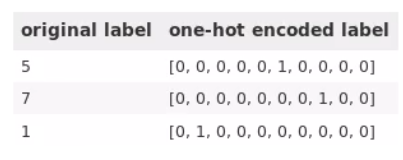

In [20]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

- The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).
- With the sklearn package, we use the train_test_split() method to split training and testing data.
- From the tensorflow.keras.utils package, we use to_categorical method to convert the labels present in y_train and y_test into one-hot encoding.

# Building a CNN Model

- To classify the images into their respective categories, we will build a CNN model (Convolutional Neural Network). CNN is best for image classification purposes.
- We compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorise.

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Flattening
model.add(Flatten())

# Input layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train and Validate the Model
- After building the model architecture, we then train the model using model.fit(). I tried with batch size 32 and 64. Our model performed better with 64 batch size. And after 15 epochs the accuracy was stable.

In [24]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 52s 105ms/step - loss: 2.1971 - accuracy: 0.5058 - val_loss: 0.3531 - val_accuracy: 0.9033
Epoch 2/15
491/491 [==============================] - 50s 103ms/step - loss: 0.4607 - accuracy: 0.8731 - val_loss: 0.0989 - val_accuracy: 0.9814
Epoch 3/15
491/491 [==============================] - 50s 102ms/step - loss: 0.2878 - accuracy: 0.9220 - val_loss: 0.0930 - val_accuracy: 0.9792
Epoch 4/15
491/491 [==============================] - 49s 100ms/step - loss: 0.2091 - accuracy: 0.9441 - val_loss: 0.0621 - val_accuracy: 0.9870
Epoch 5/15
491/491 [==============================] - 49s 101ms/step - loss: 0.1817 - accuracy: 0.9513 - val_loss: 0.0467 - val_accuracy: 0.9892
Epoch 6/15
491/491 [==============================] - 50s 102ms/step - loss: 0.1593 - accuracy: 0.9588 - val_loss: 0.0462 - val_accuracy: 0.9865
Epoch 7/15
491/491 [==============================] - 50s 101ms/step - loss: 0.1645 - accuracy: 0.9573 - val_loss: 0.0532 - val_ac

- Our model got a 97% accuracy on the training dataset. 
- With matplotlib, we plot the graph for accuracy and the loss.

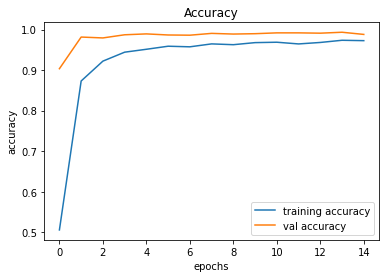

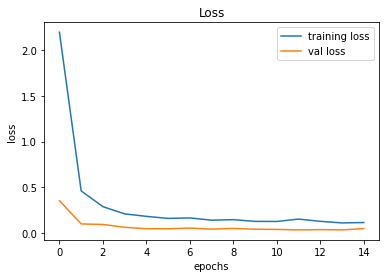

In [25]:
# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Test our model with test dataset

In [27]:
# Testing accuracy on test dataset
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)

#pred = model.predict_classes(X_test)
y_predict = np.argmax(model.predict(X_test), axis=-1)

In [28]:
y_predict[0]

16

- Our dataset contains a test folder and in a test.csv file, we have the details related to the image path and their respective class labels. 
- We extract the image path and labels using pandas. 
- Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data. 

In [29]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, y_predict))

0.9646080760095012


- From the sklearn.metrics, we imported the accuracy_score and observed how our model predicted the actual labels. 
- We achieved a 96% accuracy in this model.

## Saving the Model

- In the end, we are going to save the model that we have trained using the Keras, model.save() function.

In [31]:
model.save("traffic_classifier.h5")

# Testing on other single image

In [106]:
model = load_model('traffic_classifier.h5')

classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

image = Image.open('E:/analytics/projects/Traffic/Test/00068.png')
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)

pred = np.argmax(model.predict([image]), axis=-1)[0]
classes[pred+1]

'Speed limit (80km/h)'

# Traffic Signs Recognizer GUI 

- Now we are going to build a graphical user interface for our traffic signs classifier with Tkinter. 
- Tkinter is a GUI toolkit in the standard python library.
- We will first load the trained model ‘traffic_classifier.h5’ using Keras. And then we build the GUI for uploading the image and a button is used to classify which calls the classify() function. 
- The classify() function is converting the image into the dimension of shape (1, 30, 30, 3). This is because to predict the traffic sign we have to provide the same dimension we have used when building the model. 
- Then we predict the class, the model.predict_classes(image) returns us a number between (0-42) which represents the class it belongs to. We use the dictionary to get the information about the class.

In [142]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy

# Load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

# Initialise GUI
top=tk.Tk()
top.geometry('1000x600')
top.title('Traffic Sign Recognizer')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',25,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = numpy.argmax(model.predict([image]), axis=-1)[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',15,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',20,'bold'))

upload.pack(side=BOTTOM,pady=100)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Traffic Sign Recognizer",pady=20, font=('arial',40,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Dangerous curve right


# Traffic Sign Recognition through WebCam

In [144]:
import numpy as np

classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

import cv2
font = cv2.FONT_HERSHEY_SIMPLEX

from keras.models import load_model
model = load_model('traffic_classifier.h5')

cap=cv2.VideoCapture(0)
while cap.isOpened():
        _,imgOrg = cap.read()
        
        # Process image
        img = imgOrg
        img = cv2.resize(img,(30,30))
        img = np.expand_dims(img, axis=0)
        img = np.array(img)
        
        cv2.putText(imgOrg, "CLASS: ", (20,35), font, 0.75, (0,0,255), 2, cv2.LINE_AA)
        
        # Prediction
        pred = np.argmax(model.predict([img]), axis=-1)[0]
        
        cv2.putText(imgOrg, str(pred+1)+" "+classes[pred+1], (120,35), font, 0.75, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow("Result", imgOrg)
        
        if cv2.waitKey(1) == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# THANK YOU